In [235]:
import hvplot.pandas
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Import API key
from geoapify import geoapify_key

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [236]:
# Open_Spaces csv import

csv_path = 'data/VPA_Open_Space.csv'
read_csv = pd.read_csv(csv_path)
information_df = pd.DataFrame(read_csv)

In [237]:
information_df

,FID,LGA,VM_PARCEL_,VM_PARCE_1,DATA_SOURC,OS_CATEGOR,OS_CATEG_2,OWNER_TYPE,PARK_NAME,OS_STATUS,...,VEAC_ID,WATER_BODY,OS_TYPE,COASTAL,MANAGER_NA,OWNER_NAME,Image_URL,VPA_ID,SHAPE_Length,SHAPE_Area
0,1,BOROONDARA,3\LP28215,95086,VM Features of Interest,Tertiary institutions,Not applicable,State Government,Swinburne University Of Technology & Tafe Divi...,Existing,...,,,Restricted public land,,NO DATA,Swinburne University of Technology,https://lh3.googleusercontent.com/-QP2NylEZuhE...,1500,0.000742,1.698581e-08
1,2,BOROONDARA,159\LP5481,203973157,VM Parcels,Parks and gardens,Not applicable,Local government,Kate Campbell Reserve,Existing,...,,,Public open space,,NO DATA,Boroondara City Council,https://lh3.googleusercontent.com/-rdTUgqfNyXg...,1501,0.001105,6.526377e-08
2,3,BOROONDARA,3\TP84208,203973089,VM Parcels,Parks and gardens,Not applicable,Local government,Kate Campbell Reserve,Existing,...,,,Public open space,,NO DATA,Boroondara City Council,https://lh3.googleusercontent.com/-rdTUgqfNyXg...,1502,0.001003,5.615414e-08
3,4,BOROONDARA,1\TP84208,203973073,VM Parcels,Parks and gardens,Not applicable,Local government,Kate Campbell Reserve,Existing,...,,,Public open space,,NO DATA,Boroondara City Council,https://lh3.googleusercontent.com/-rdTUgqfNyXg...,1503,0.001102,6.530917e-08
4,5,BOROONDARA,1\TP802753,203972979,VM Parcels,Parks and gardens,Not applicable,Local government,Kate Campbell Reserve,Existing,...,,,Public open space,,NO DATA,Boroondara City Council,https://lh3.googleusercontent.com/-rdTUgqfNyXg...,1504,0.001327,9.438898e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38805,38806,FRANKSTON,,,Frankston Council,Transport reservations,Median park,Local government,Taverner Square Reserve,Existing,...,,,Public open space,,NO DATA,Frankston City Council,https://lh3.googleusercontent.com/-7jagzn1L1NA...,39508,0.002004,2.802900e-07
38806,38807,YARRA,2\LP38905,2015149,VM Parcels,Non-government schools,Not applicable,Private,St Kevins College - Waterford,Existing,...,,,Private open space,,NO DATA,NO DATA,https://lh3.googleusercontent.com/-uz6koGrYKZE...,39509,0.000825,2.976525e-08
38807,38808,FRANKSTON,NO DATA,NO DATA,Melbourne Water,Natural and semi-natural open space,Not applicable,Public authority,Seaford Swamp (MWC Drain),Existing,...,Q007956,,Public open space,,NO DATA,Melbourne Water Corporation,https://lh3.googleusercontent.com/-mCSb2HRxCUs...,39303,0.008203,4.191129e-06
38808,38809,FRANKSTON,CP151911,1114997,VM Parcels,Parks and gardens,Not applicable,Local government,Broughton Reserve,Existing,...,,,Public open space,,Frankston Council,Frankston City Council,https://lh3.googleusercontent.com/-rdTUgqfNyXg...,39304,0.003781,4.406187e-07


In [238]:
parks_info_df = information_df.groupby('OS_CATEGOR')
park_counts = parks_info_df['OS_CATEGOR'].count()
len(park_counts)


13

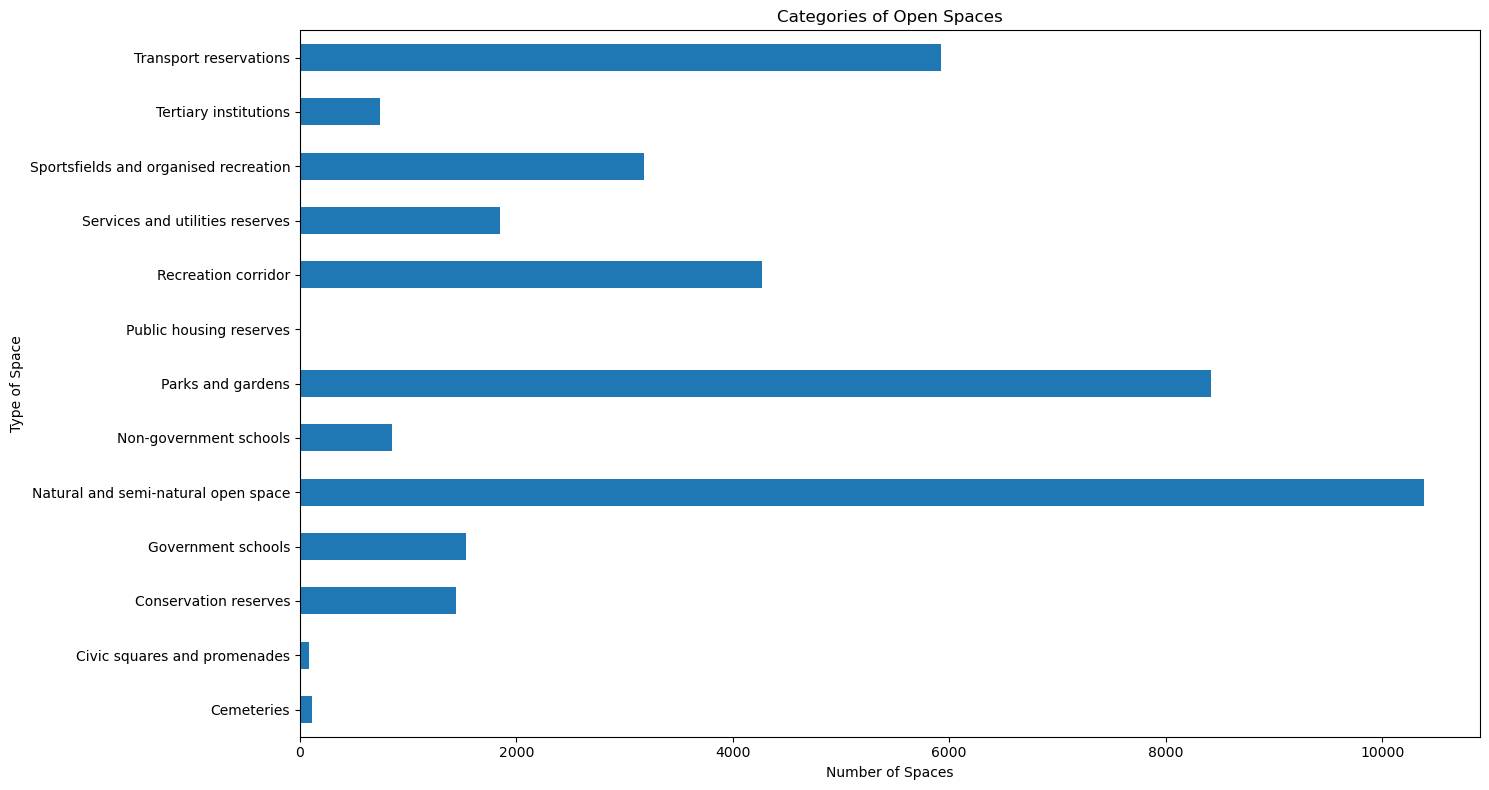

In [239]:

type_chart = park_counts.plot(kind = 'barh', figsize = (15,8))

type_chart.set_xlabel("Number of Spaces")
type_chart.set_ylabel("Type of Space")
type_chart.set_title("Categories of Open Spaces")
plt.tight_layout()
plt.savefig("figures/Categories_of_Public_Spaces.png", dpi = 300)
plt.show()


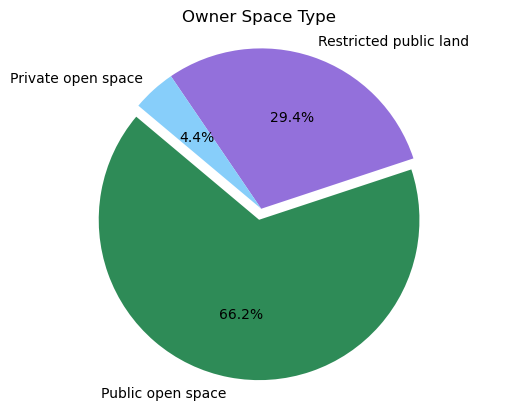

In [240]:
labels = ["Public open space", "Restricted public land", "Private open space"]
colours = ["seagreen", "mediumpurple", "lightskyblue"]
explode = (0.07, 0, 0)

plt.pie(information_df['OS_TYPE'].value_counts(), explode=explode, labels=labels, colors=colours,
        autopct="%1.1f%%", startangle=140)

plt.axis("equal")
plt.title("Owner Space Type")
plt.savefig("figures/Owner_Space_Type.png")
plt.show()


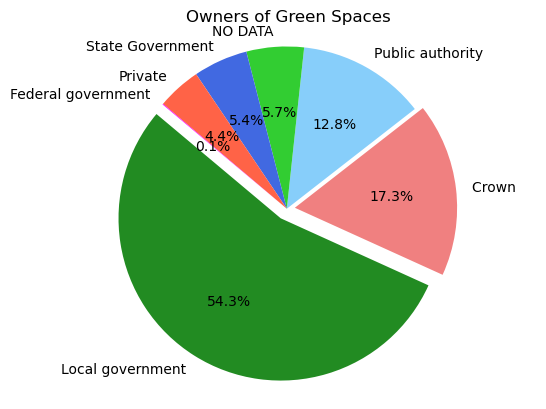

In [241]:
labels = ["Local government", "Crown ", "Public authority", "NO DATA", "State Government", "Private", "Federal government"]
colours = ["forestgreen", "lightcoral", "lightskyblue", "limegreen", "royalblue", "tomato", "fuchsia"]
explode = (0.07, 0.05, 0, 0, 0, 0, 0)

plt.pie(information_df['OWNER_TYPE'].value_counts(), explode=explode, labels=labels, colors=colours,
        autopct="%1.1f%%", startangle=140)

plt.axis("equal")
plt.title("Owners of Green Spaces")
plt.savefig("figures/Owners_of_Green_Spacese.png")
plt.show()

In [242]:
# Filter for public open spaces
information_df_parks_df = information_df.loc[(information_df['OS_TYPE'] == 'Public open space')]

In [243]:
# Create a bucket and loop through all the LGA names in the dataframe and store them
lga_list = pd.DataFrame(information_df_parks_df.groupby('LGA')['PARK_NAME'].count().sort_values(ascending = False).index)
lga_list

lga_bucket = []

for i in range(len(lga_list)):
    lga_bucket.append(str(lga_list['LGA'][i].title()))

In [244]:
# Create a bucket and loop through all the park counts in the dataframe and store them
lga_park_count = pd.DataFrame(information_df_parks_df.groupby('LGA')['PARK_NAME'].count().sort_values(ascending = False))
lga_park_count = lga_park_count['PARK_NAME'].reset_index('LGA')
lga_park_count

park_count = []

for i in range(len(lga_park_count)):
    park_count.append(int(lga_park_count['PARK_NAME'][i]))

In [245]:
# Create a DataFrame to hold both sets of information, LGA & Open Space counts & sort them alphabetically.
lga_park_count_df = pd.DataFrame({"Local Government Area" : lga_bucket, 
                                  "Public Open Spaces" : park_count})

lga_park_count_df.sort_values(by = 'Local Government Area', ascending = True)

,Local Government Area,Public Open Spaces
18,Banyule,625
30,Bayside,131
19,Boroondara,576
10,Brimbank,986
5,Cardinia,1287
1,Casey,1853
23,Darebin,513
6,Frankston,1166
29,Glen Eira,160
17,Greater Dandenong,626


In [246]:
# Create a list of columns names to use when importing the next file
column_names = ['LGA code', 'Local Government Area', '2021 Population', 
                '2022 Population', 'Population Change 21-22', '% Change 21-22', 'Area (km2)', 
                'Population Density (persons/km2)'
            ]

In [247]:

# Import the excel file and use the column_names bucket to use as the column names.
lga_information_path = pd.read_excel('data/LGA_ABS_data_21_22.xlsx', 
                                     sheet_name = 2, 
                                     header = 7,
                                     names = column_names,
                                     usecols = 'A,B,C,D,F,G,M,N',
                                     skiprows = 1,
                                     na_values = 0)
lga_information = pd.DataFrame(lga_information_path)
lga_information

,LGA code,Local Government Area,2021 Population,2022 Population,Population Change 21-22,% Change 21-22,Area (km2),Population Density (persons/km2)
0,20110,Alpine,13166.0,13187.0,21.0,0.2,4788.2,2.8
1,20260,Ararat,11827.0,11754.0,-73.0,-0.6,4211.1,2.8
2,20570,Ballarat,113504.0,115951.0,2447.0,2.2,739.0,156.9
3,20660,Banyule,127370.0,127348.0,-22.0,NaN,62.5,2036.3
4,20740,Bass Coast,40675.0,41798.0,1123.0,2.8,865.8,48.3
...,...,...,...,...,...,...,...,...
83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,"Source: Regional population, 2021-22",NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [248]:
# Any NaN values in the population change % replaced by zeroes

work_bucket = []
change_search = range(len(lga_information['% Change 21-22']))

for i in change_search:
    
    work_bucket.append(lga_information['% Change 21-22'][i])

work_bucket = pd.Series(work_bucket, dtype=object).fillna(0).tolist()

lga_information['% Change 21-22'] = work_bucket
    

In [249]:
lga_information

,LGA code,Local Government Area,2021 Population,2022 Population,Population Change 21-22,% Change 21-22,Area (km2),Population Density (persons/km2)
0,20110,Alpine,13166.0,13187.0,21.0,0.2,4788.2,2.8
1,20260,Ararat,11827.0,11754.0,-73.0,-0.6,4211.1,2.8
2,20570,Ballarat,113504.0,115951.0,2447.0,2.2,739.0,156.9
3,20660,Banyule,127370.0,127348.0,-22.0,0.0,62.5,2036.3
4,20740,Bass Coast,40675.0,41798.0,1123.0,2.8,865.8,48.3
...,...,...,...,...,...,...,...,...
83,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
84,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
85,"Source: Regional population, 2021-22",NaN,NaN,NaN,NaN,0.0,NaN,NaN
86,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [250]:
# Filter information by the LGA list we've gotten from the first dataset we've imported using the .isin
lga_filtered = lga_information.loc[lga_information['Local Government Area'].isin(lga_bucket)]
lga_filtered = lga_filtered.reset_index(drop = True)

In [251]:
# Merge the information into one DF using Merge on the LGA name & sort data alphabetically
merged_vic_data_df = pd.merge(lga_filtered, lga_park_count_df, how = 'inner', on = 'Local Government Area')
merged_vic_data_df.sort_values(by = ['Local Government Area'] ,ascending = True)

,LGA code,Local Government Area,2021 Population,2022 Population,Population Change 21-22,% Change 21-22,Area (km2),Population Density (persons/km2),Public Open Spaces
0,20660,Banyule,127370.0,127348.0,-22.0,0.0,62.5,2036.3,625
1,20910,Bayside,102328.0,102177.0,-151.0,-0.1,37.2,2745.9,131
2,21110,Boroondara,169789.0,169500.0,-289.0,-0.2,60.2,2816.7,576
3,21180,Brimbank,196631.0,193256.0,-3375.0,-1.7,123.4,1566.1,986
4,21450,Cardinia,119573.0,123104.0,3531.0,3.0,1282.6,96.0,1287
5,21610,Casey,369558.0,378831.0,9273.0,2.5,409.4,925.3,1853
6,21890,Darebin,150296.0,150483.0,187.0,0.1,53.5,2814.3,513
7,22170,Frankston,140824.0,141078.0,254.0,0.2,129.6,1088.6,1166
8,22310,Glen Eira,150638.0,151694.0,1056.0,0.7,38.7,3920.7,160
9,22670,Greater Dandenong,160100.0,159151.0,-949.0,-0.6,129.5,1228.5,626


In [252]:
merged_vic_data_df.head()

,LGA code,Local Government Area,2021 Population,2022 Population,Population Change 21-22,% Change 21-22,Area (km2),Population Density (persons/km2),Public Open Spaces
0,20660,Banyule,127370.0,127348.0,-22.0,0.0,62.5,2036.3,625
1,20910,Bayside,102328.0,102177.0,-151.0,-0.1,37.2,2745.9,131
2,21110,Boroondara,169789.0,169500.0,-289.0,-0.2,60.2,2816.7,576
3,21180,Brimbank,196631.0,193256.0,-3375.0,-1.7,123.4,1566.1,986
4,21450,Cardinia,119573.0,123104.0,3531.0,3.0,1282.6,96.0,1287


In [253]:
# Imprt the school information dataset.
school_csv_path = 'data/dv309_schoollocations2021.csv'

school_read_csv = pd.read_csv(school_csv_path, encoding = 'cp1252')

school_count_df = pd.DataFrame(school_read_csv)

In [254]:
# Replace unwanted string characters in the LGA Name column to allow us to merge the data later

school_count_df['LGA_Name'] = school_count_df['LGA_Name'].str.replace(r" \(.*\)", "")

In [255]:
# Filter the schools dataset by only the LGAs in the existing dataframe
school_count_df_filtered = school_count_df.loc[school_count_df['LGA_Name'].isin(merged_vic_data_df['Local Government Area'])]

In [256]:
# Group by the LGA and school type to get all the LGa schools information to merge with dataframe later
by_school_type_df = school_count_df_filtered.groupby(['LGA_Name', 'School_Type'])['SCHOOL_NO'].count()
school_type_df = pd.DataFrame(by_school_type_df)

# Drop all the information into the table to use .loc to slice.
school_type_df = school_type_df.reset_index(inplace = False)
school_type_df

,LGA_Name,School_Type,SCHOOL_NO
0,Banyule,Pri/Sec,3
1,Banyule,Primary,29
2,Banyule,Secondary,8
3,Banyule,Special,3
4,Bayside,Pri/Sec,3
...,...,...,...
125,Yarra,Special,1
126,Yarra Ranges,Pri/Sec,8
127,Yarra Ranges,Primary,58
128,Yarra Ranges,Secondary,10


In [257]:
# Loop through to find all the different types of schools

school_range = range(len(school_type_df['School_Type'].unique()))

school_types = []

for i in school_range:
    school_types.append(school_type_df['School_Type'].unique()[i])

In [258]:
# for each school type create a dictionary within a list to hold the information. Can call the list by the dictionary index.
school_search_len = range(len(school_types))
dictionary_list = [{} for i in school_search_len]
dictionary_list

[{}, {}, {}, {}, {}]

In [259]:
# Loop through each school type and get the information for each LGA and append it to the list of dictionaries
school_search_len = range(len(school_types))

counter = 0

for i in school_search_len:
    search_df = school_type_df.loc[school_type_df['School_Type'] == school_types[i]].reset_index(drop = True)
    for j in range(len(search_df['LGA_Name'])):
        dictionary_list[counter][search_df['LGA_Name'][j]] = search_df['SCHOOL_NO'][j]
    counter += 1

In [260]:
# Define variables which hold the information for each school type

primary_secondary_counts = dictionary_list[0]
primary_counts = dictionary_list[1]
secondary_counts = dictionary_list[2]
special_counts = dictionary_list[3]
language_counts = dictionary_list[4]

In [261]:
# For each school type go through and make a DF of each LGA & count of school

prisec_df = pd.Series(primary_secondary_counts, name = 'Primary/Secondary Schools')
prisec_df = pd.DataFrame(prisec_df).reset_index(drop = False)
prisec_df = prisec_df.rename(columns= {'index' : 'Local Government Area'})
prisec_df['Primary/Secondary Schools'] = prisec_df['Primary/Secondary Schools'].astype(int)

In [262]:
# For each school type go through and make a DF of each LGA & count of school

pri_df = pd.Series(primary_counts, name = 'Primary Schools')
pri_df = pd.DataFrame(pri_df).reset_index(drop = False)
pri_df = pri_df.rename(columns= {'index' : 'Local Government Area'})
pri_df['Primary Schools'] = pri_df['Primary Schools'].astype(int)

In [263]:

# For each school type go through and make a DF of each LGA & count of school

sec_df = pd.Series(secondary_counts, name = 'Secondary Schools')
sec_df = pd.DataFrame(sec_df).reset_index(drop = False)
sec_df = sec_df.rename(columns= {'index' : 'Local Government Area'})
sec_df['Secondary Schools'] = sec_df['Secondary Schools'].astype(int)

In [264]:
# For each school type go through and make a DF of each LGA & count of school

spec_df = pd.Series(special_counts, name = 'Special Schools')
spec_df = pd.DataFrame(spec_df).reset_index(drop = False)
spec_df = spec_df.rename(columns= {'index' : 'Local Government Area'})
spec_df['Special Schools'] = spec_df['Special Schools'].astype(int)

In [265]:
# For each school type go through and make a DF of each LGA & count of school

lang_df = pd.Series(language_counts, name = 'Language Schools')
lang_df = pd.DataFrame(lang_df).reset_index(drop = False)
lang_df = lang_df.rename(columns= {'index' : 'Local Government Area'})
lang_df['Language Schools'] = lang_df['Language Schools'].astype(int)

In [266]:
# Merge the school information into the combined DF
schools_park_vic_data_df = pd.merge(merged_vic_data_df, prisec_df, how = 'outer', on = 'Local Government Area')
schools_park_vic_data_df = pd.merge(schools_park_vic_data_df, pri_df, how = 'outer', on = 'Local Government Area')
schools_park_vic_data_df = pd.merge(schools_park_vic_data_df, sec_df, how = 'outer', on = 'Local Government Area')
schools_park_vic_data_df = pd.merge(schools_park_vic_data_df, spec_df, how = 'outer', on = 'Local Government Area')
schools_park_vic_data_df = pd.merge(schools_park_vic_data_df, lang_df, how = 'outer', on = 'Local Government Area')

In [267]:
# For some reason when we tried converting from Float to int, it rolled integer counts which were zero as the highest negative integer. This code converts the nan values into zeros without the integer rollback issue

search_columns = ['Primary/Secondary Schools', 'Primary Schools', 'Secondary Schools', 'Special Schools', 'Language Schools']

for i in search_columns:
    arr = np.array(schools_park_vic_data_df[i])
    arr = np.nan_to_num(arr, nan=0, posinf=None, neginf=None)  # Replace infinite values with a specific value
    arr = arr.astype(int)  # Convert to integearr
    schools_park_vic_data_df[i] = arr


In [268]:
# Get the school count totals into a list. The benefit of a list here is we can double check against the original df using .loc and .counts to slice by LGA and school type.

total_schools_bucket = {}
column_list = ['Primary/Secondary Schools', 'Primary Schools', 'Secondary Schools', 'Special Schools', 'Language Schools']
counter = 0

search_range = range(len(schools_park_vic_data_df['Primary/Secondary Schools']))

for i in search_range:
    tally = schools_park_vic_data_df['Primary/Secondary Schools'][i] + schools_park_vic_data_df['Primary Schools'][i] + schools_park_vic_data_df['Secondary Schools'][i] + schools_park_vic_data_df['Special Schools'][i] + schools_park_vic_data_df['Language Schools'][i]
    total_schools_bucket[schools_park_vic_data_df['Local Government Area'][i]] = tally

# Turn the dictionary into a series with LGA as the index
total_schools_bucket_series = pd.Series(total_schools_bucket, index = schools_park_vic_data_df['Local Government Area'])

# Turn the series' values (which is the total school counts) into a new column in the merged data frame.
schools_park_vic_data_df['Total Schools'] = total_schools_bucket_series.values

In [269]:
# Yarra Ranges is significantly further out than the other LGAs. Would not be a suitable LGA for a family looking for 

In [270]:
schools_park_vic_data_df.to_excel('data/Complete_Dataset.xlsx')

In [271]:
schools_park_vic_data_df

,LGA code,Local Government Area,2021 Population,2022 Population,Population Change 21-22,% Change 21-22,Area (km2),Population Density (persons/km2),Public Open Spaces,Primary/Secondary Schools,Primary Schools,Secondary Schools,Special Schools,Language Schools,Total Schools
0,20660,Banyule,127370.0,127348.0,-22.0,0.0,62.5,2036.3,625,3,29,8,3,0,43
1,20910,Bayside,102328.0,102177.0,-151.0,-0.1,37.2,2745.9,131,3,19,5,1,0,28
2,21110,Boroondara,169789.0,169500.0,-289.0,-0.2,60.2,2816.7,576,13,31,9,5,0,58
3,21180,Brimbank,196631.0,193256.0,-3375.0,-1.7,123.4,1566.1,986,1,45,10,3,0,59
4,21450,Cardinia,119573.0,123104.0,3531.0,3.0,1282.6,96.0,1287,3,28,6,1,0,38
5,21610,Casey,369558.0,378831.0,9273.0,2.5,409.4,925.3,1853,9,59,13,2,0,83
6,21890,Darebin,150296.0,150483.0,187.0,0.1,53.5,2814.3,513,5,30,7,4,0,46
7,22170,Frankston,140824.0,141078.0,254.0,0.2,129.6,1088.6,1166,2,28,8,3,0,41
8,22310,Glen Eira,150638.0,151694.0,1056.0,0.7,38.7,3920.7,160,10,21,6,2,0,39
9,22670,Greater Dandenong,160100.0,159151.0,-949.0,-0.6,129.5,1228.5,626,7,26,7,3,1,44


In [272]:
Location_merged_map_ploting = schools_park_vic_data_df.copy()
schools_park_vic_data_df.head()

,LGA code,Local Government Area,2021 Population,2022 Population,Population Change 21-22,% Change 21-22,Area (km2),Population Density (persons/km2),Public Open Spaces,Primary/Secondary Schools,Primary Schools,Secondary Schools,Special Schools,Language Schools,Total Schools
0,20660,Banyule,127370.0,127348.0,-22.0,0.0,62.5,2036.3,625,3,29,8,3,0,43
1,20910,Bayside,102328.0,102177.0,-151.0,-0.1,37.2,2745.9,131,3,19,5,1,0,28
2,21110,Boroondara,169789.0,169500.0,-289.0,-0.2,60.2,2816.7,576,13,31,9,5,0,58
3,21180,Brimbank,196631.0,193256.0,-3375.0,-1.7,123.4,1566.1,986,1,45,10,3,0,59
4,21450,Cardinia,119573.0,123104.0,3531.0,3.0,1282.6,96.0,1287,3,28,6,1,0,38


In [273]:
# Add columns the airports data we will fetch using the Geoapify API
# Note that we used "" to specify initial entry.
Location_merged_map_ploting["Lat"] = ""
Location_merged_map_ploting["Lon"] = ""

Location_merged_map_ploting.head()
# Define the API parameters
params = {
    "apiKey":geoapify_key,
    "format":"json"
}

# Set the base URL
base_url = "https://api.geoapify.com/v1/geocode/search"
# Loop through the cities_pd DataFrame and search coordinates for each city
for index, row in Location_merged_map_ploting.iterrows():

    # Get the city's name & add ", Australia" to the string so geoapify finds the correct city
    city = row["Local Government Area"] + ", Victoria,Australia"

    # Add the current city to the parameters
    params["text"] = f"{city}"

    # Make the API request
    response = requests.get(base_url, params=params)
    
    # Convert reponse to JSON
    response = response.json()

    # Extract latitude and longitude
    Location_merged_map_ploting.loc[index, "Lat"] = response["results"][0]["lat"]
    Location_merged_map_ploting.loc[index, "Lon"] = response["results"][0]["lon"]
    
    # Log the search results
    print(f"Coordinates for {city} fetched...")

# Display sample data to confirm that the coordinates appear
Location_merged_map_ploting.sample(20)
# Configure the map
map_plot_2 = Location_merged_map_ploting.hvplot.points(
    "Lon",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 900,
    frame_height = 900,
    size = "Population Density (persons/km2)",
    scale = 0.5,
    color = "Local Government Area"
)

# Display the map plot
map_plot_2

Coordinates for Banyule, Victoria,Australia fetched...
Coordinates for Bayside, Victoria,Australia fetched...
Coordinates for Boroondara, Victoria,Australia fetched...
Coordinates for Brimbank, Victoria,Australia fetched...
Coordinates for Cardinia, Victoria,Australia fetched...
Coordinates for Casey, Victoria,Australia fetched...
Coordinates for Darebin, Victoria,Australia fetched...
Coordinates for Frankston, Victoria,Australia fetched...
Coordinates for Glen Eira, Victoria,Australia fetched...
Coordinates for Greater Dandenong, Victoria,Australia fetched...
Coordinates for Hobsons Bay, Victoria,Australia fetched...
Coordinates for Hume, Victoria,Australia fetched...
Coordinates for Kingston, Victoria,Australia fetched...
Coordinates for Knox, Victoria,Australia fetched...
Coordinates for Manningham, Victoria,Australia fetched...
Coordinates for Maribyrnong, Victoria,Australia fetched...
Coordinates for Maroondah, Victoria,Australia fetched...
Coordinates for Melbourne, Victoria,Aust

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (Local Government Area,Population Density (persons/km2))

In [274]:

# Quick representation as a bar chart to visualise the number of open spaces per LGA

open_space = schools_park_vic_data_df[['Local Government Area', 'Public Open Spaces']]
open_space_df = open_space.set_index('Local Government Area')
open_space_df = open_space_df.sort_values(by = "Public Open Spaces", ascending = False).head(10)
open_space_df


,Public Open Spaces
Local Government Area,
Yarra Ranges,2376
Casey,1853
Mornington,1819
Hume,1333
Whittlesea,1316
Cardinia,1287
Frankston,1166
Wyndham,1056
Melton,1055


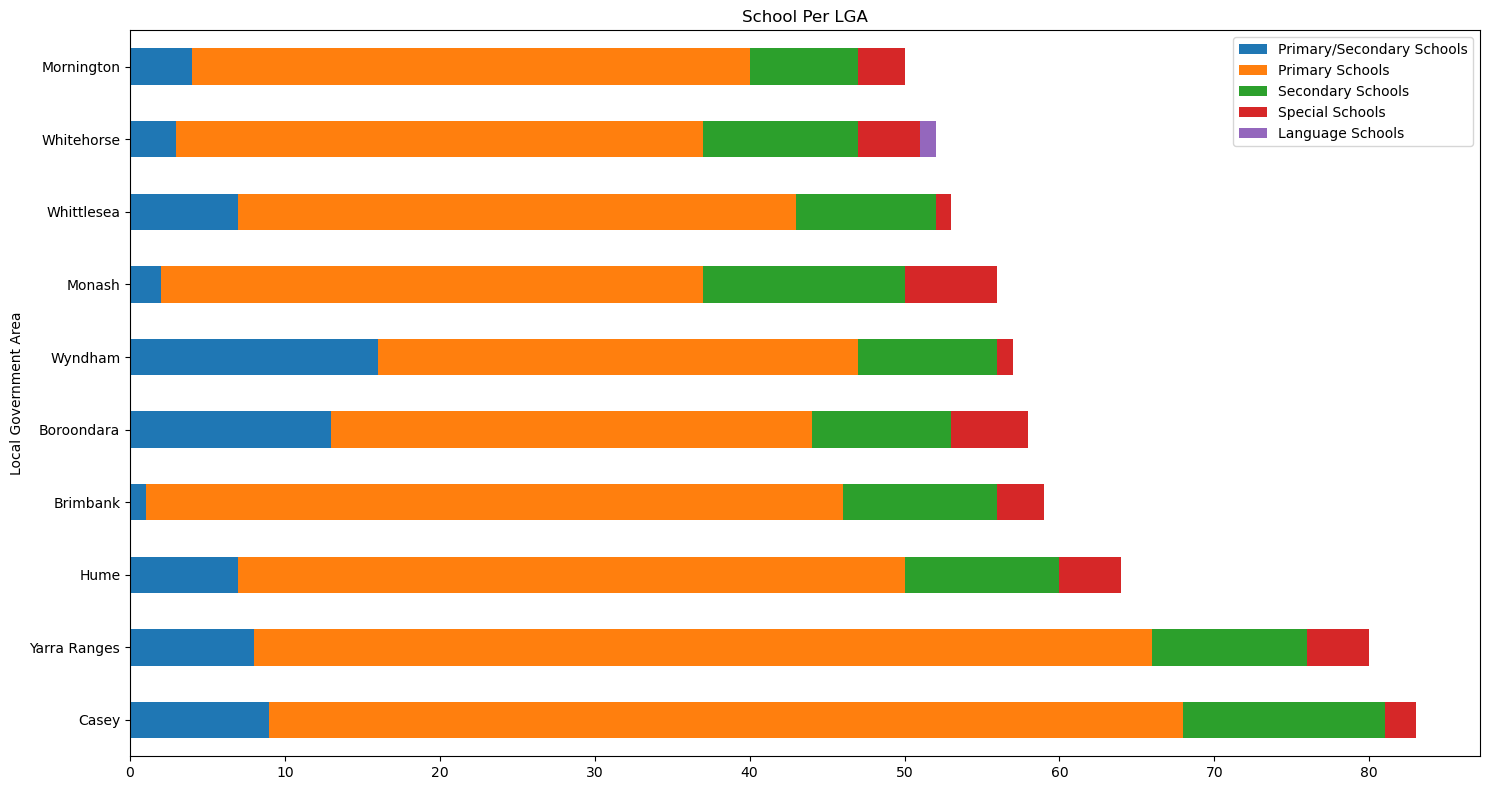

In [275]:
 
schools_data = schools_park_vic_data_df[['Local Government Area', 'Primary/Secondary Schools', 'Primary Schools', 'Secondary Schools', 'Special Schools', 'Language Schools', 'Total Schools']]
schools_data = schools_data.sort_values(by = 'Total Schools', ascending = False)
schools_data_sorted = schools_data[['Local Government Area', 'Primary/Secondary Schools', 'Primary Schools', 'Secondary Schools', 'Special Schools', 'Language Schools']]
schools_data_sorted = schools_data_sorted.head(10)

# plot data in stack manner of bar type
schools_data_sorted.plot(x='Local Government Area', kind='barh', stacked=True,
        title='School Per LGA', figsize = (15,8))
plt.tight_layout()
plt.savefig("figures/Schools_per_LGA.png", dpi = 300)
plt.show()

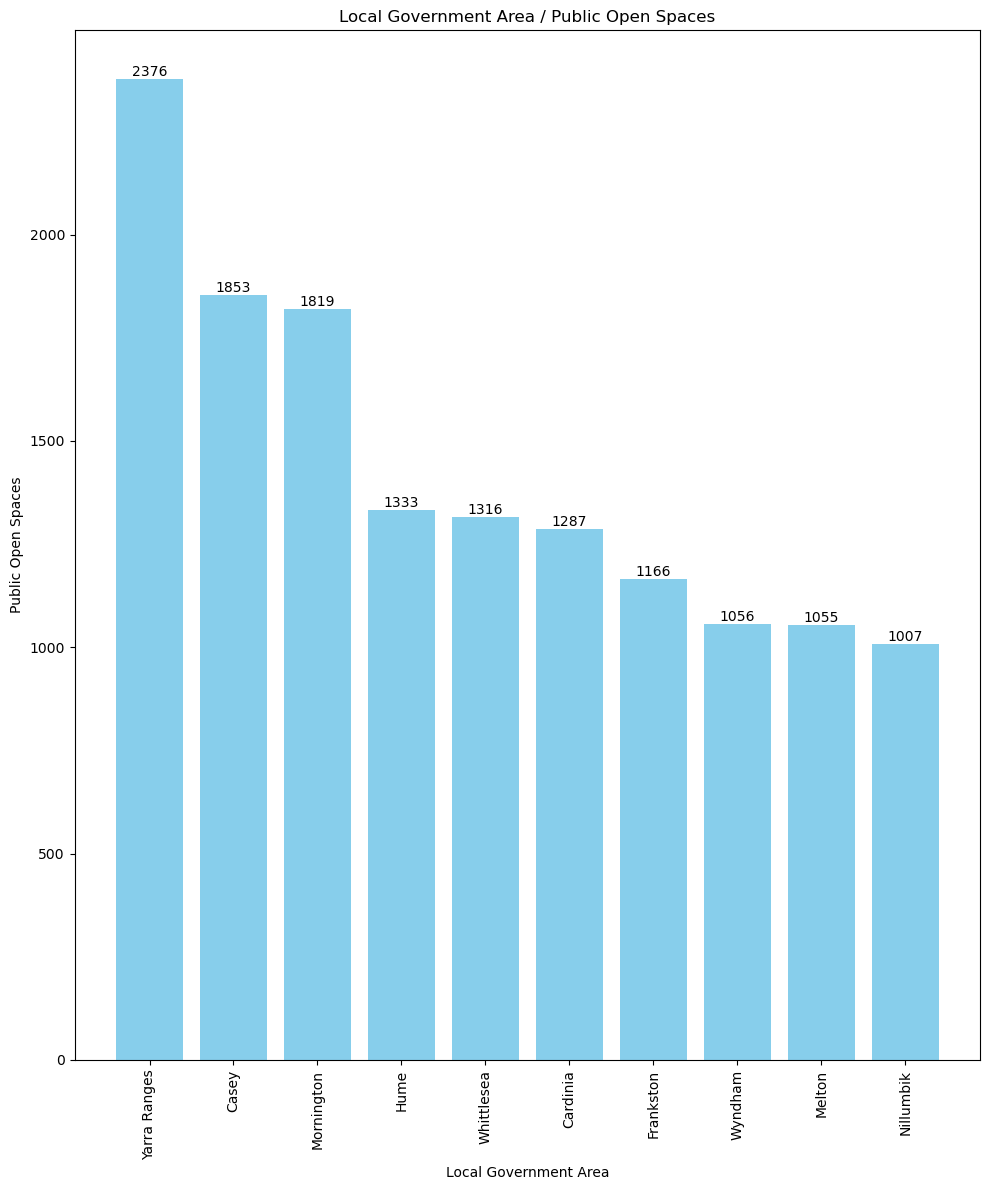

In [276]:

#Plotting the bar graph
space_data = schools_park_vic_data_df[['Local Government Area', 'Public Open Spaces']]
space_data_sorted = space_data.sort_values(by = 'Public Open Spaces', ascending = False)
space_data_sorted = space_data_sorted.head(10)
space_data_sorted

plt.figure(figsize=(10, 12))
bars = plt.bar(space_data_sorted['Local Government Area'], space_data_sorted["Public Open Spaces"], color='skyblue')
plt.xlabel('Local Government Area')
plt.ylabel('Public Open Spaces')
plt.title('Local Government Area / Public Open Spaces')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
# Displaying values on the bars
for bar in bars:
   yval = bar.get_height()
   plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 0), va='bottom', ha='center')
plt.tight_layout()
plt.savefig('figures/lga_open_spaces.png')

plt.show()


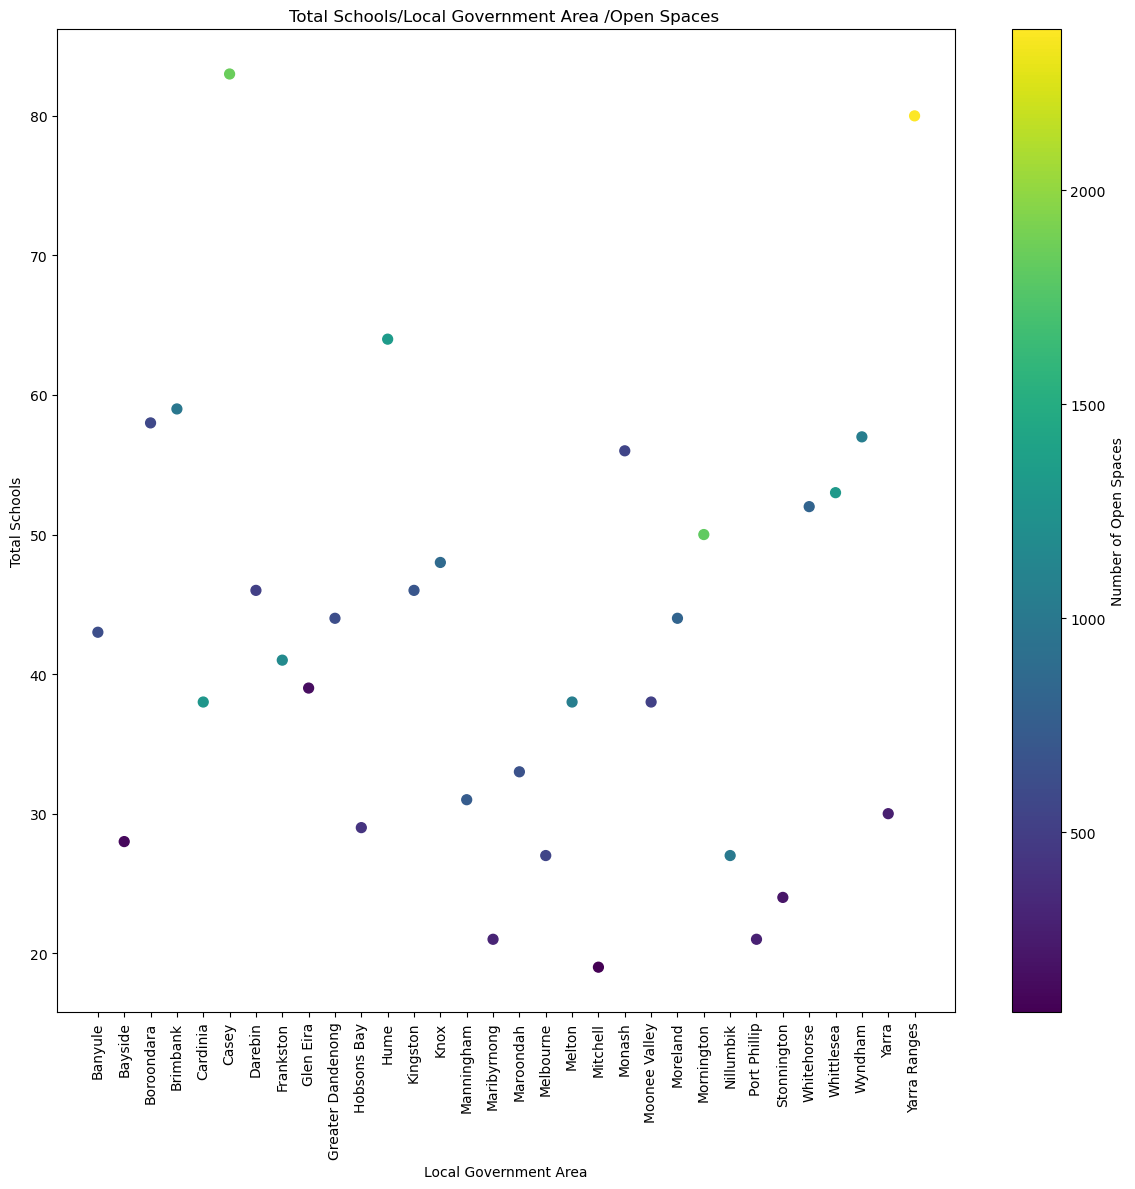

In [277]:
local_gov_areas = schools_park_vic_data_df['Local Government Area']
population_density = schools_park_vic_data_df['Total Schools']
# Assuming there's another dimension named 'Fourth Dimension'
fourth_dimension = schools_park_vic_data_df['Public Open Spaces']
# Define colors for the fourth dimension
colors = np.linspace(0, 1, len(fourth_dimension))  # Use a colormap to generate colors based on the fourth dimension values
# Plotting
plt.figure(figsize=(12, 12))
scatter = plt.scatter(local_gov_areas, population_density, c=fourth_dimension, cmap='viridis', s=50)
plt.colorbar(scatter, label='Number of Open Spaces')  # Add color bar for the fourth dimension
plt.xlabel('Local Government Area')
plt.ylabel('Total Schools')
plt.title('Total Schools/Local Government Area /Open Spaces ')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.savefig('figures/schoolsvsLGAvsOpenSpaces.png', dpi = 500)
plt.show()

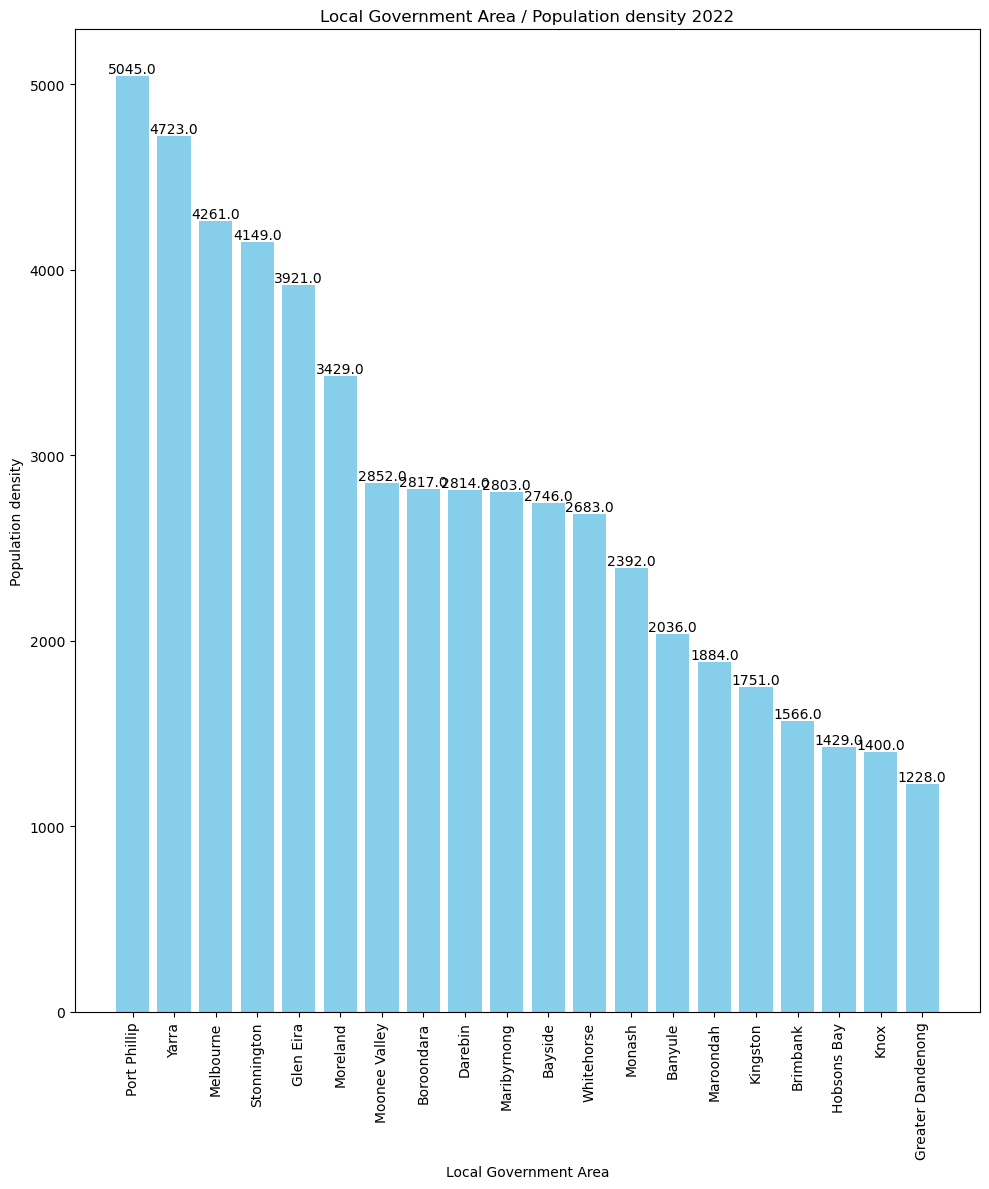

In [278]:
#Plotting the bar graph

density_lga = schools_park_vic_data_df[['Local Government Area', 'Population Density (persons/km2)']]
density_lga = density_lga.sort_values(by = 'Population Density (persons/km2)', ascending = False)
density_lga = density_lga.head(20)
density_lga

plt.figure(figsize=(10, 12))
bars = plt.bar(density_lga['Local Government Area'], density_lga['Population Density (persons/km2)'], color='skyblue')
plt.xlabel('Local Government Area')
plt.ylabel('Population density')
plt.title('Local Government Area / Population density 2022')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
# Displaying values on the bars
for bar in bars:
   yval = bar.get_height()
   plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 0), va='bottom', ha='center')
plt.tight_layout()
plt.savefig('figures/LGAvsPopulation.png')
plt.show()

The r-squared is: 0.5627358005826393


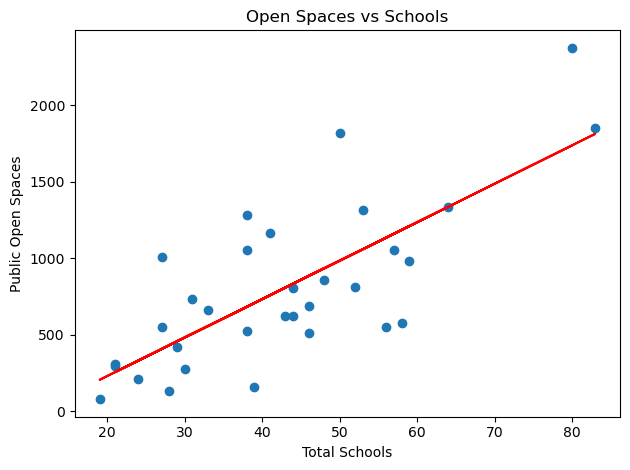

In [279]:
# Regression correlation between 
x_values = schools_park_vic_data_df['Total Schools']
y_values = schools_park_vic_data_df['Public Open Spaces']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Total Schools')
plt.ylabel('Public Open Spaces')
plt.title('Open Spaces vs Schools')
print(f"The r-squared is: {rvalue**2}")
plt.tight_layout()
plt.savefig('figures/spaces_vs_schools_comparison.png')
plt.show()

The r-squared is: 0.007282282595861223


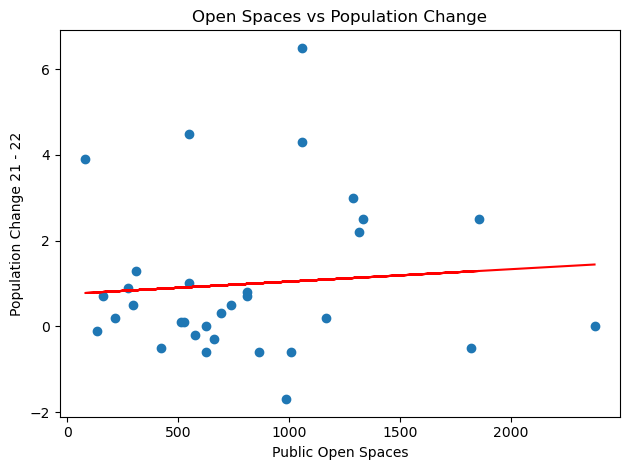

In [280]:
# Regression correlation between 
x_values = schools_park_vic_data_df['Public Open Spaces']
y_values = schools_park_vic_data_df['% Change 21-22']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Public Open Spaces')
plt.ylabel('Population Change 21 - 22')
plt.title('Open Spaces vs Population Change')
print(f"The r-squared is: {rvalue**2}")
plt.tight_layout()
plt.savefig('figures/spaces_vs_pop_change.png')
plt.show()

The r-squared is: 0.0010074926233491941


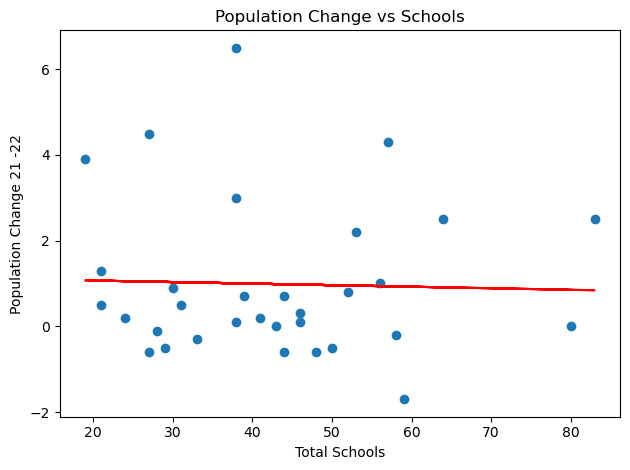

In [281]:
# Regression correlation between 
x_values = schools_park_vic_data_df['Total Schools']
y_values = schools_park_vic_data_df['% Change 21-22']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Total Schools')
plt.ylabel('Population Change 21 -22')
plt.title('Population Change vs Schools')
print(f"The r-squared is: {rvalue**2}")
plt.tight_layout()
plt.savefig('figures/pop_change_vs_schools_comparison.png')
plt.show()